# Convergence of upper and lower bound over time

Note that the events in the plot are only based on the upper bound iterations.

In [19]:
import pandas as pd

data = pd.read_json("./05_clean_data.json.zip")
# data = data.drop_duplicates(subset=["instance"])
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0        1273         2942         YASA        t2_m1_null             3.395   
1          14           20         YASA        t2_m1_null             0.183   
2        1408         3319         YASA        t2_m1_null             3.594   
3          46          244         YASA        t2_m1_null             0.257   
4         258         1542         YASA        t2_m1_null             1.176   
..        ...          ...          ...               ...               ...   
225        28           40         YASA        t2_m1_null             0.192   
226       263         1699         YASA        t2_m1_null             1.492   
227       230         1181         YASA        t2_m1_null             0.990   
228         9           16         YASA        t2_m1_null             0.202   
229        10           17         YASA        t2_m1_null             0.200   

     baseline_sample_size                  path_to_baseline_sample  \
0                      69  2023-03-01_13-51-03/44_1_7_1_sample.csv   
1                       8   2023-03-01_13-51-03/4_1_7_2_sample.csv   
2                      72  2023-03-01_13-51-03/47_1_7_2_sample.csv   
3                      38  2023-03-01_13-51-03/15_1_7_2_sample.csv   
4                     224  2023-03-01_13-51-03/25_1_7_5_sample.csv   
..                    ...                                      ...   
225                    15  2023-03-01_13-51-03/12_1_7_2_sample.csv   
226                   510  2023-03-01_13-51-03/26_1_7_1_sample.csv   
227                   246  2023-03-01_13-51-03/24_1_7_4_sample.csv   
228                     8   2023-03-01_13-51-03/2_1_7_3_sample.csv   
229                     7   2023-03-01_13-51-03/3_1_7_3_sample.csv   

                                            parameters  \
0    {'func': 'run_samplns', 'args': {'instance_nam...   
1    {'func': 'run_samplns', 'args': {'instance_nam...   
2    {'func': 'run_samplns', 'args': {'instance_nam...   
3    {'func': 'run_samplns', 'args': {'instance_nam...   
4    {'func': 'run_samplns', 'args': {'instance_nam...   
..                                                 ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...   
226  {'func': 'run_samplns', 'args': {'instance_nam...   
227  {'func': 'run_samplns', 'args': {'instance_nam...   
228  {'func': 'run_samplns', 'args': {'instance_nam...   
229  {'func': 'run_samplns', 'args': {'instance_nam...   

                  instance_name  lower_bound  upper_bound  \
0                      XSEngine           32           40   
1                    ChatClient            7            7   
2                        ea2468           24           40   
3                          dell           31           31   
4    fiasco_2020-12-01_14-09-14          196          196   
..                          ...          ...          ...   
225                   APL-Model            8            8   
226  uclibc_2008-06-05_13-46-47          505          505   
227  fiasco_2017-09-26_11-30-56          224          225   
228                         lcm            6            6   
229                       email            6            6   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 210, 'nbrhd_confs': 9, 'iter...              3.395   
1    [{'nbrhd_tuples': 176, 'nbrhd_confs': 8, 'iter...              0.183   
2    [{'nbrhd_tuples': 207, 'nbrhd_confs': 5, 'iter...              3.594   
3    [{'nbrhd_tuples': 249, 'nbrhd_confs': 25, 'ite...              0.257   
4    [{'nbrhd_tuples': 235, 'nbrhd_confs': 15, 'ite...              1.176   
..                                                 ...                ...   
225  [{'nbrhd_tuples': 249, 'nbrhd_confs': 12, 'ite...              0.192   
226  [{'nbrhd_tuples': 243, 'nbrhd_confs': 44, 'ite...              1.492   
227  [{'nbrhd_tuples': 234, 'nbrhd_confs': 22, 'ite...              0.990   
228  [{'nbrhd_t

In [20]:
from _conf import EXTERNAL_BOUNDS
best_lower_bound = data.groupby(["instance_name"])["lower_bound"].max().reset_index().rename(columns={"lower_bound": "best_lower_bound"})
best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound["internal_best_lower_bound"] = best_lower_bound["best_lower_bound"]
external_best_lb = pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS]).groupby(["instance_name"])["best_lower_bound"].max().reset_index()
best_lower_bound = pd.concat([best_lower_bound, external_best_lb]).groupby(["instance_name"])[["best_lower_bound", "internal_best_lower_bound"]].max().reset_index()
best_lower_bound

instance_name  best_lower_bound  internal_best_lower_bound
0                           APL                 7                        7.0
1                     APL-Model                 8                        8.0
2               BankingSoftware                28                       28.0
3                 BattleofTanks               256                      256.0
4                    ChatClient                 7                        7.0
5                          DMIE                16                       16.0
6                        E-Shop                10                       10.0
7                    EMBToolkit              1872                     1872.0
8                        FameDB                 8                        8.0
9                    FeatureIDE                 7                        7.0
10                FreeBSD-8_0_0                30                       29.0
11                          PPU                12                       12.0
12                     SafeBali                11                       11.0
13                  SortingLine                 9                        9.0
14                     TightVNC                 8                        8.0
15                       Violet                15                       15.0
16            WaterlooGenerated                82                       82.0
17                     XSEngine                32                       32.0
18                     aaed2000                51                       51.0
19                     am31_sim                29                       29.0
20             atlas_mips32_4kc                33                       33.0
21                        axTLS                10                       10.0
22                  berkeleyDB1                15                       15.0
23                  berkeleyDB2                12                       12.0
24               busybox-1_18_0                13                       13.0
25               busybox-1_29_2                20                       20.0
26  busybox_2007-01-24_09-14-09                21                       21.0
27  busybox_2020-12-16_21-53-05                18                       18.0
28                    calculate                 5                        5.0
29                          car                 5                        5.0
30                         dell                31                       31.0
31              eCos-3-0_i386pc                33                       33.0
32                       ea2468                32                       32.0
33                        email                 6                        6.0
34   fiasco_2017-09-26_11-30-56               225                      225.0
35   fiasco_2020-12-01_14-09-14               196                      196.0
36           financial_services              4304                     4290.0
37                fs_2017-05-22               396                      396.0
38                          gpl                16                       16.0
39              integrator_arm7                32                       31.0
40                          lcm                 6                        6.0
41  soletta_2015-06-26_18-38-56                24                       24.0
42   toybox_2006-10-31_23-30-06                 8                        8.0
43   toybox_2020-12-06_00-02-46                 8                        8.0
44   uclibc_2008-06-05_13-46-47               505                      505.0
45   uclibc_2020-12-24_11-54-53               365                      365.0

## Extend the data by some additional information on the best values

In [21]:
# Find the best values for each instance as reference.

# add them to the data as reference
data = data.merge(best_lower_bound, left_on="instance_name", right_on="instance_name")
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0        1273         2942         YASA        t2_m1_null             3.395   
1        1273         2942         YASA        t2_m1_null             3.352   
2        1273         2942         YASA        t2_m1_null             3.362   
3        1273         2942         YASA        t2_m1_null             3.333   
4        1273         2942         YASA        t2_m1_null             3.392   
..        ...          ...          ...               ...               ...   
225      1229         2875         YASA        t2_m1_null             3.368   
226      1229         2875         YASA        t2_m1_null             3.357   
227      1229         2875         YASA        t2_m1_null             3.285   
228      1229         2875         YASA        t2_m1_null             3.433   
229      1229         2875         YASA        t2_m1_null             3.378   

     baseline_sample_size                  path_to_baseline_sample  \
0                      69  2023-03-01_13-51-03/44_1_7_1_sample.csv   
1                      69  2023-03-01_13-51-03/44_1_7_5_sample.csv   
2                      69  2023-03-01_13-51-03/44_1_7_2_sample.csv   
3                      69  2023-03-01_13-51-03/44_1_7_4_sample.csv   
4                      69  2023-03-01_13-51-03/44_1_7_3_sample.csv   
..                    ...                                      ...   
225                    77  2023-03-01_13-51-03/41_1_7_4_sample.csv   
226                    77  2023-03-01_13-51-03/41_1_7_5_sample.csv   
227                    77  2023-03-01_13-51-03/41_1_7_3_sample.csv   
228                    77  2023-03-01_13-51-03/41_1_7_2_sample.csv   
229                    77  2023-03-01_13-51-03/41_1_7_1_sample.csv   

                                            parameters     instance_name  \
0    {'func': 'run_samplns', 'args': {'instance_nam...          XSEngine   
1    {'func': 'run_samplns', 'args': {'instance_nam...          XSEngine   
2    {'func': 'run_samplns', 'args': {'instance_nam...          XSEngine   
3    {'func': 'run_samplns', 'args': {'instance_nam...          XSEngine   
4    {'func': 'run_samplns', 'args': {'instance_nam...          XSEngine   
..                                                 ...               ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...  atlas_mips32_4kc   
226  {'func': 'run_samplns', 'args': {'instance_nam...  atlas_mips32_4kc   
227  {'func': 'run_samplns', 'args': {'instance_nam...  atlas_mips32_4kc   
228  {'func': 'run_samplns', 'args': {'instance_nam...  atlas_mips32_4kc   
229  {'func': 'run_samplns', 'args': {'instance_nam...  atlas_mips32_4kc   

     lower_bound  upper_bound  \
0             32           40   
1             31           39   
2             31           40   
3             31           39   
4             28           40   
..           ...          ...   
225           28           40   
226           33           40   
227           31           39   
228           31           40   
229           32           39   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 210, 'nbrhd_confs': 9, 'iter...              3.395   
1    [{'nbrhd_tuples': 221, 'nbrhd_confs': 4, 'iter...              3.352   
2    [{'nbrhd_tuples': 187, 'nbrhd_confs': 4, 'iter...              3.362   
3    [{'nbrhd_tuples': 35, 'nbrhd_confs': 1, 'itera...              3.333   
4    [{'nbrhd_tuples': 237, 'nbrhd_confs': 6, 'iter...              3.392   
..                                                 ...                ...   
225  [{'nbrhd_tuples': 241, 'nbrhd_confs': 6, 'iter...              3.368   
226  [{'nbrhd_tuples': 16, 'nbrhd_confs': 3, 'itera...              3.357   
227  [{'nbrhd_tuples': 224, 'nbrhd_confs': 5, 'iter...              3.285   
228  [{'nbrhd_tuples': 145, 'nbrhd_confs': 3, 'iter...              3.433   
229  [{'nbrhd_tuples': 238, 'nbrhd_confs': 1, 'iter...    

## A look onto the data never hurts

In [22]:
data

num_vars  num_clauses baseline_alg baseline_alg_conf  runtime_baseline  \
0        1273         2942         YASA        t2_m1_null             3.395   
1        1273         2942         YASA        t2_m1_null             3.352   
2        1273         2942         YASA        t2_m1_null             3.362   
3        1273         2942         YASA        t2_m1_null             3.333   
4        1273         2942         YASA        t2_m1_null             3.392   
..        ...          ...          ...               ...               ...   
225      1229         2875         YASA        t2_m1_null             3.368   
226      1229         2875         YASA        t2_m1_null             3.357   
227      1229         2875         YASA        t2_m1_null             3.285   
228      1229         2875         YASA        t2_m1_null             3.433   
229      1229         2875         YASA        t2_m1_null             3.378   

     baseline_sample_size                  path_to_baseline_sample  \
0                      69  2023-03-01_13-51-03/44_1_7_1_sample.csv   
1                      69  2023-03-01_13-51-03/44_1_7_5_sample.csv   
2                      69  2023-03-01_13-51-03/44_1_7_2_sample.csv   
3                      69  2023-03-01_13-51-03/44_1_7_4_sample.csv   
4                      69  2023-03-01_13-51-03/44_1_7_3_sample.csv   
..                    ...                                      ...   
225                    77  2023-03-01_13-51-03/41_1_7_4_sample.csv   
226                    77  2023-03-01_13-51-03/41_1_7_5_sample.csv   
227                    77  2023-03-01_13-51-03/41_1_7_3_sample.csv   
228                    77  2023-03-01_13-51-03/41_1_7_2_sample.csv   
229                    77  2023-03-01_13-51-03/41_1_7_1_sample.csv   

                                            parameters     instance_name  \
0    {'func': 'run_samplns', 'args': {'instance_nam...          XSEngine   
1    {'func': 'run_samplns', 'args': {'instance_nam...          XSEngine   
2    {'func': 'run_samplns', 'args': {'instance_nam...          XSEngine   
3    {'func': 'run_samplns', 'args': {'instance_nam...          XSEngine   
4    {'func': 'run_samplns', 'args': {'instance_nam...          XSEngine   
..                                                 ...               ...   
225  {'func': 'run_samplns', 'args': {'instance_nam...  atlas_mips32_4kc   
226  {'func': 'run_samplns', 'args': {'instance_nam...  atlas_mips32_4kc   
227  {'func': 'run_samplns', 'args': {'instance_nam...  atlas_mips32_4kc   
228  {'func': 'run_samplns', 'args': {'instance_nam...  atlas_mips32_4kc   
229  {'func': 'run_samplns', 'args': {'instance_nam...  atlas_mips32_4kc   

     lower_bound  upper_bound  \
0             32           40   
1             31           39   
2             31           40   
3             31           39   
4             28           40   
..           ...          ...   
225           28           40   
226           33           40   
227           31           39   
228           31           40   
229           32           39   

                                        iteration_info  time_used_by_yasa  \
0    [{'nbrhd_tuples': 210, 'nbrhd_confs': 9, 'iter...              3.395   
1    [{'nbrhd_tuples': 221, 'nbrhd_confs': 4, 'iter...              3.352   
2    [{'nbrhd_tuples': 187, 'nbrhd_confs': 4, 'iter...              3.362   
3    [{'nbrhd_tuples': 35, 'nbrhd_confs': 1, 'itera...              3.333   
4    [{'nbrhd_tuples': 237, 'nbrhd_confs': 6, 'iter...              3.392   
..                                                 ...                ...   
225  [{'nbrhd_tuples': 241, 'nbrhd_confs': 6, 'iter...              3.368   
226  [{'nbrhd_tuples': 16, 'nbrhd_confs': 3, 'itera...              3.357   
227  [{'nbrhd_tuples': 224, 'nbrhd_confs': 5, 'iter...              3.285   
228  [{'nbrhd_tuples': 145, 'nbrhd_confs': 3, 'iter...              3.433   
229  [{'nbrhd_tuples': 238, 'nbrhd_confs': 1, 'iter...    

The data field `iteration_info` contains a list of dicts for each iteration. This dict looks as follows:
```
{ 'nbrhd_tuples': 166,  # the tuples to be covered in this iteration
  'nbrhd_confs': 5,     # the number of configurations deleted from the sample
  'iteration': 0,       # the number of the iteration, in this case the first iteration
  'lb': 3.0,            # the current best lb (global)
  'ub': 23,             # the current best ub (global)
  'time': 1.0297019481658936,    # overall time at the end of this iteration
  'iteration_time': 0.48791050910949707,   # time in this iteration
  'events': [[0.0350489616394043, 'neighborhood_selected'],   # times of events in this iteration. Good for finding the culprit of long runtimes.
   [0.24133801460266113, 'local_cds_computed'],
   [0.29517436027526855, 'model_built'],
   [0.48662543296813965, 'model_optimized'],
   [0.48789548873901367, 'neighborhood_optimized'],
   [0.48791003227233887, 'global_lb_iteration_finished']]}
```

In [23]:
instance_infos = (
    data[["instance_name", "num_vars", "num_clauses"]]
    .drop_duplicates()
    .sort_values(by=[ "num_vars", "num_clauses"])
)
instance_infos

instance_name  num_vars  num_clauses
85                     calculate         9           15
50                           lcm         9           16
60                         email        10           17
5                     ChatClient        14           20
220   toybox_2006-10-31_23-30-06        16           13
90                           car        16           33
100                   FeatureIDE        19           27
25                        FameDB        22           40
40                           APL        23           35
215                     SafeBali        24           45
80                      TightVNC        28           39
175                    APL-Model        28           40
35                           gpl        38           99
180                  SortingLine        39           77
15                          dell        46          244
150                          PPU        52          109
70                   berkeleyDB1        76          147
110                        axTLS        96          183
105                       Violet       101          203
45                   berkeleyDB2       119          346
185  soletta_2015-06-26_18-38-56       129          192
75                 BattleofTanks       144          769
195              BankingSoftware       176          280
115   fiasco_2017-09-26_11-30-56       230         1181
20    fiasco_2020-12-01_14-09-14       258         1542
55    uclibc_2008-06-05_13-46-47       263         1699
155   uclibc_2020-12-24_11-54-53       272         1670
160                       E-Shop       326          499
210   toybox_2020-12-06_00-02-46       334           92
135                         DMIE       366          627
170  busybox_2007-01-24_09-14-09       540          429
125                fs_2017-05-22       557         4992
205            WaterlooGenerated       580          879
95            financial_services       771         7238
120               busybox-1_18_0       854         1164
145               busybox-1_29_2      1018          997
30   busybox_2020-12-16_21-53-05      1050          996
65                      am31_sim      1178         2747
200                   EMBToolkit      1179         5414
225             atlas_mips32_4kc      1229         2875
165              eCos-3-0_i386pc      1245         3723
130              integrator_arm7      1272         2980
0                       XSEngine      1273         2942
140                     aaed2000      1298         3036
190                FreeBSD-8_0_0      1397        15692
10                        ea2468      1408         3319

## Extract the iteration data from each optimization

Bring them in a format that can easily be plotted by seaborn.

In [24]:
import pandas as pd


# Collect the data from the iteration_info events.
class EventCollector:
    def __init__(self):
        self.events = {
            "time": [],
            "val": [],
            "type": [],
            "instance": [],
            "path": [],
            #"alg": [],
            "initial_sample_size": [],
            "y": [],
            "final": [],
        }

    def __call__(self, row):
        print(row)
        it_data = row["iteration_info"]

        def add(val, lbub, time, final=False):
            self.events["time"].append(time / 60)
            self.events["val"].append(val)
            self.events["type"].append(lbub)
            self.events["instance"].append(row["instance_name"])
            #self.events["alg"].append(row["baseline_alg"])
            self.events["path"].append(row["path_to_baseline_sample"])
            self.events["initial_sample_size"].append(row["baseline_sample_size"])
            self.events["y"].append(100 * (val / row["best_lower_bound"]))
            self.events["final"].append(final)

        # add a zero entry
        add(0, "Lower", 0)
        add(row["baseline_sample_size"], "Upper", 0)
        for event in it_data:
            add(
                event["lb"],
                "Lower",
                event["time"],
                final=event["lb"] == row["lower_bound"],
            )
            add(
                event["ub"],
                "Upper",
                event["time"],
                final=event["ub"] == row["upper_bound"],
            )


ec = EventCollector()
data.sort_values(
    by=["num_vars", "num_clauses"]
).apply(ec, axis=1)
t = pd.DataFrame(ec.events)

num_vars                                                                     9
num_clauses                                                                 15
baseline_alg                                                              YASA
baseline_alg_conf                                                   t2_m1_null
runtime_baseline                                                         0.199
baseline_sample_size                                                        10
path_to_baseline_sample                 2023-03-01_13-51-03/1_1_7_4_sample.csv
parameters                   {'func': 'run_samplns', 'args': {'instance_nam...
instance_name                                                        calculate
lower_bound                                                                  5
upper_bound                                                                  5
iteration_info               [{'nbrhd_tuples': 38, 'nbrhd_confs': 10, 'iter...
time_used_by_yasa                                   

num_vars                                                                   101
num_clauses                                                                203
baseline_alg                                                              YASA
baseline_alg_conf                                                   t2_m1_null
runtime_baseline                                                         0.294
baseline_sample_size                                                        27
path_to_baseline_sample                2023-03-01_13-51-03/19_1_7_2_sample.csv
parameters                   {'func': 'run_samplns', 'args': {'instance_nam...
instance_name                                                           Violet
lower_bound                                                                 15
upper_bound                                                                 17
iteration_info               [{'nbrhd_tuples': 153, 'nbrhd_confs': 7, 'iter...
time_used_by_yasa                                   

In [25]:
t

time   val   type   instance  \
0       0.000000   0.0  Lower  calculate   
1       0.000000  10.0  Upper  calculate   
2       0.000848   5.0  Lower  calculate   
3       0.000848   5.0  Upper  calculate   
4       0.000000   0.0  Lower  calculate   
...          ...   ...    ...        ...   
15221  59.304128  41.0  Upper     ea2468   
15222  59.929268  31.0  Lower     ea2468   
15223  59.929268  41.0  Upper     ea2468   
15224  59.947720  31.0  Lower     ea2468   
15225  59.947720  41.0  Upper     ea2468   

                                          path  initial_sample_size        y  \
0       2023-03-01_13-51-03/1_1_7_4_sample.csv                   10    0.000   
1       2023-03-01_13-51-03/1_1_7_4_sample.csv                   10  200.000   
2       2023-03-01_13-51-03/1_1_7_4_sample.csv                   10  100.000   
3       2023-03-01_13-51-03/1_1_7_4_sample.csv                   10  100.000   
4       2023-03-01_13-51-03/1_1_7_1_sample.csv                   10    0.000   
...                                        ...                  ...      ...   
15221  2023-03-01_13-51-03/47_1_7_4_sample.csv                   72  128.125   
15222  2023-03-01_13-51-03/47_1_7_4_sample.csv                   72   96.875   
15223  2023-03-01_13-51-03/47_1_7_4_sample.csv                   72  128.125   
15224  2023-03-01_13-51-03/47_1_7_4_sample.csv                   72   96.875   
15225  2023-03-01_13-51-03/47_1_7_4_sample.csv                   72  128.125   

       final  
0      False  
1      False  
2       True  
3       True  
4      False  
...      ...  
15221   True  
15222   True  
15223   True  
15224   True  
15225   True  

[15226 rows x 8 columns]

## Feature Models on which SampLNS did not finish a single iteration in time

These models have very large initial samples (more than a thousand configurations), for which the current implementation is not equipped.
The problem lies more in the data structures than the actual approach.
They should be feasible with some extra effort in making those data structures more efficient.

*A lower bound is still computed for these instances, but without iterations of SampLNS, only the final lower bound is saved after SampLNS aborted.*

In [26]:
t_ = t.groupby(["instance", "path"])["time"].max().reset_index()
unsolved_instances = t_[t_["time"] == 0]["instance"].unique().tolist()
unsolved_instances

[]

## Plot the convergence for all other models.

In [27]:
solved_instances = [
    x for x in instance_infos["instance_name"].tolist() if x not in unsolved_instances
]

In [28]:
# Prepare plotting
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt

In [29]:
def plot_lb_ub_progress(data, axis, xmax=16, single_instance=False):
    instance_descr = "Model"
    bound_descr = "Bound"
    t_ = data.rename(columns={"instance": instance_descr, "type": bound_descr})
    if single_instance:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue="path",
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
            legend=False,
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue="path",
            marker="X",
            palette="tab10",
            legend=False,
        )
    else:
        sns.lineplot(
            data=t_,
            ax=axis,
            x="time",
            y="y",
            style=bound_descr,
            hue=instance_descr,
            units="path",
            estimator=None,
            markers=False,
            palette="tab10",
            drawstyle="steps-post",
            dashes=[(1.5, 1.5), (3, 3)],
        )
        sns.scatterplot(
            data=t_[t_[bound_descr] == "Upper"],
            ax=axis,
            x="time",
            y="y",
            hue=instance_descr,
            marker="X",
            palette="tab10",
            legend=False,
        )
    axis.set_xlim(-0.1, xmax)
    axis.set_xlabel("Time in (min)")
    axis.set_ylabel("Relative to best lower bound (%)")
    if single_instance:
        axis.set_title(
            f"Convergence of upper and lower bound - {data['instance'].tolist()[0]}"
        )
    else:
        axis.set_title("Convergence of upper and lower bound")

### All models in one plot

This shows us that most models really make quick progress and only a few take a little longer.

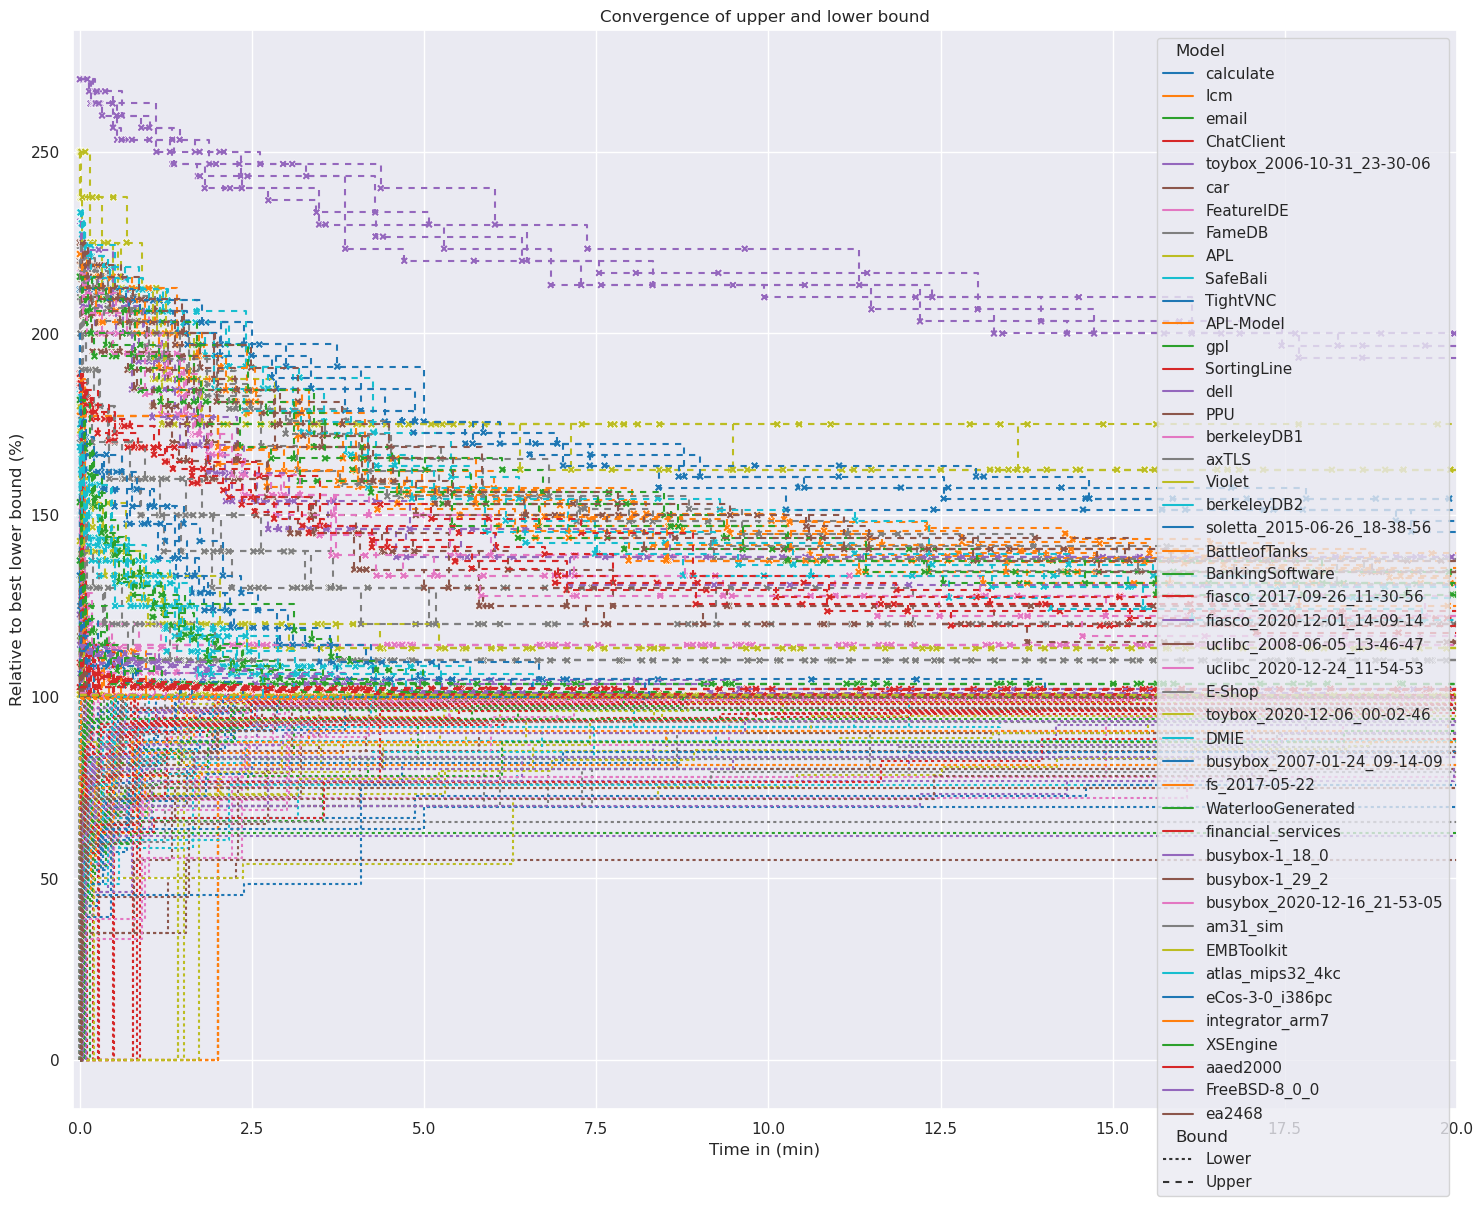

In [30]:
plt.figure(figsize=(15, 13))
plot_lb_ub_progress(t[t["instance"].isin(solved_instances)], plt.gca(), xmax=20)
plt.tight_layout()
plt.show()

### Every model with all its five runs.

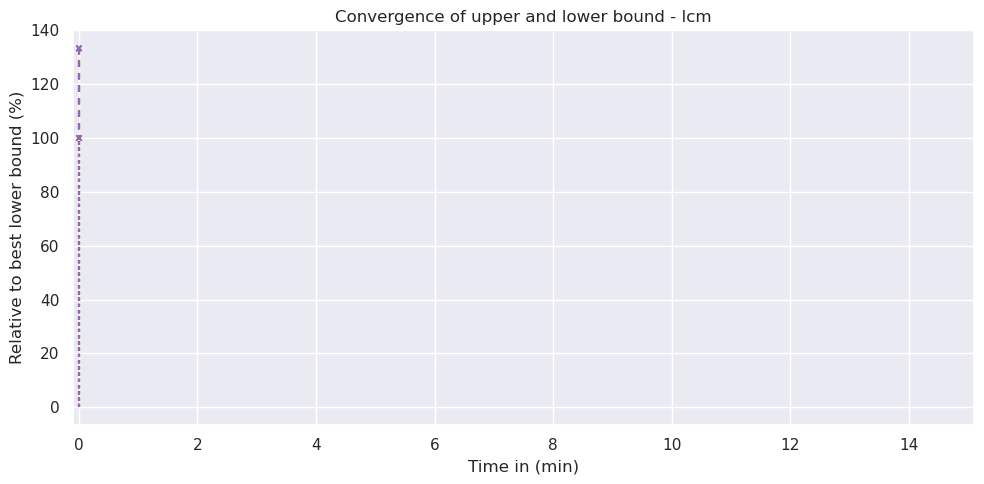

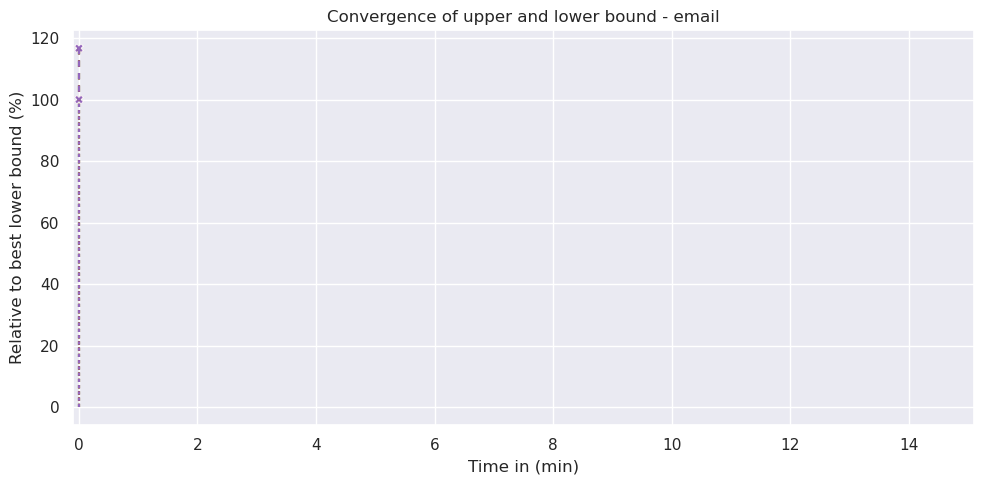

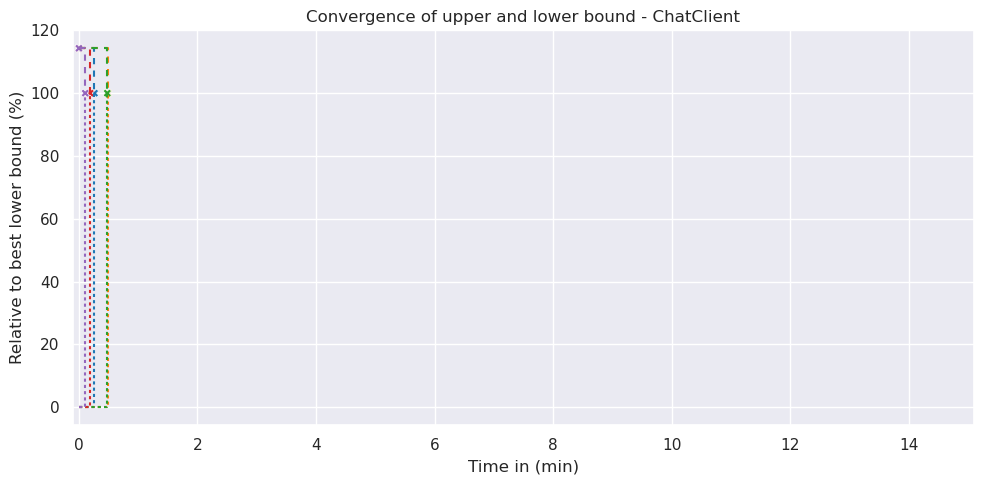

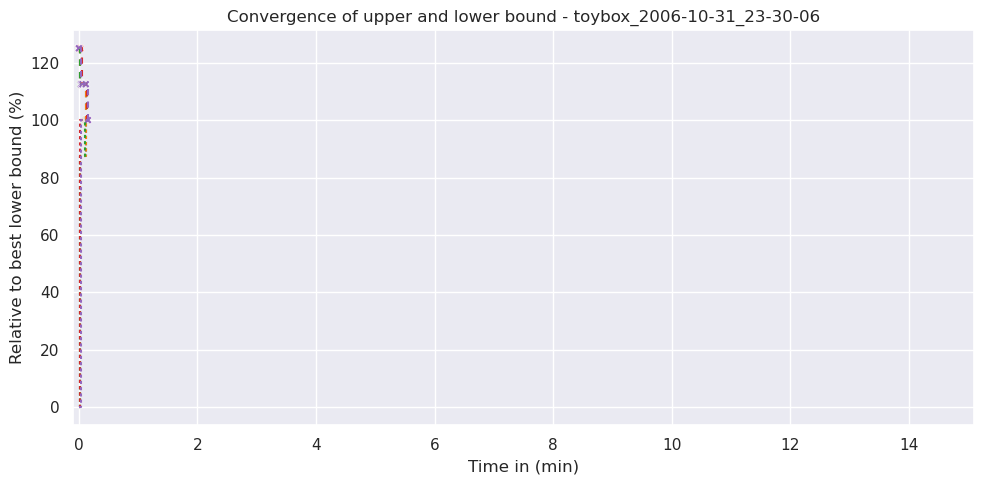

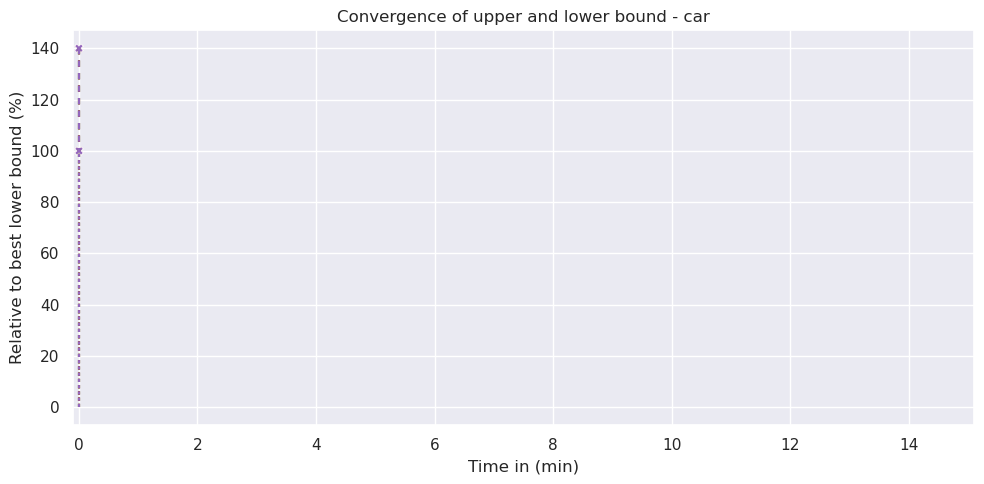

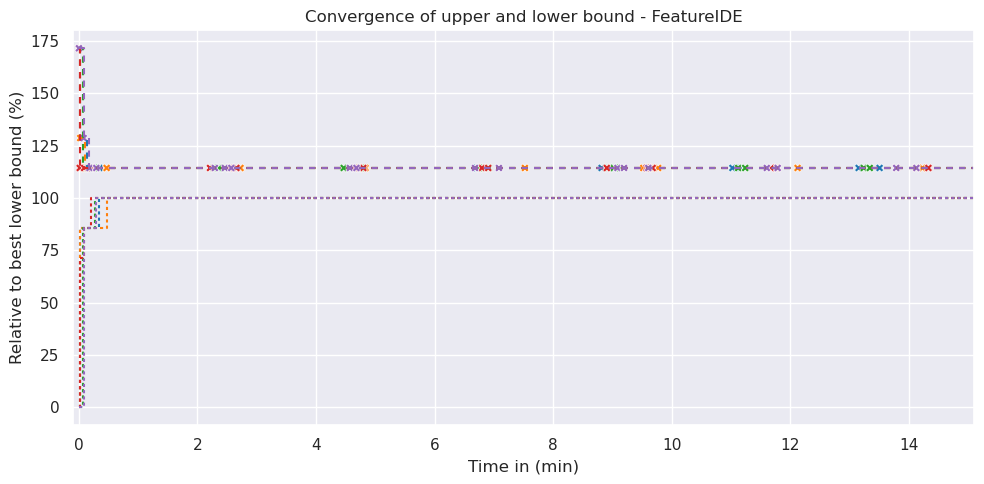

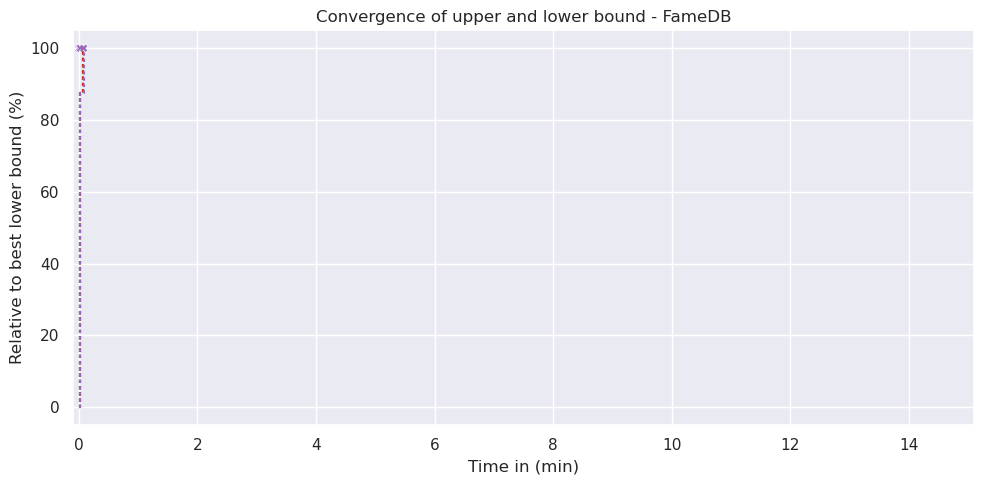

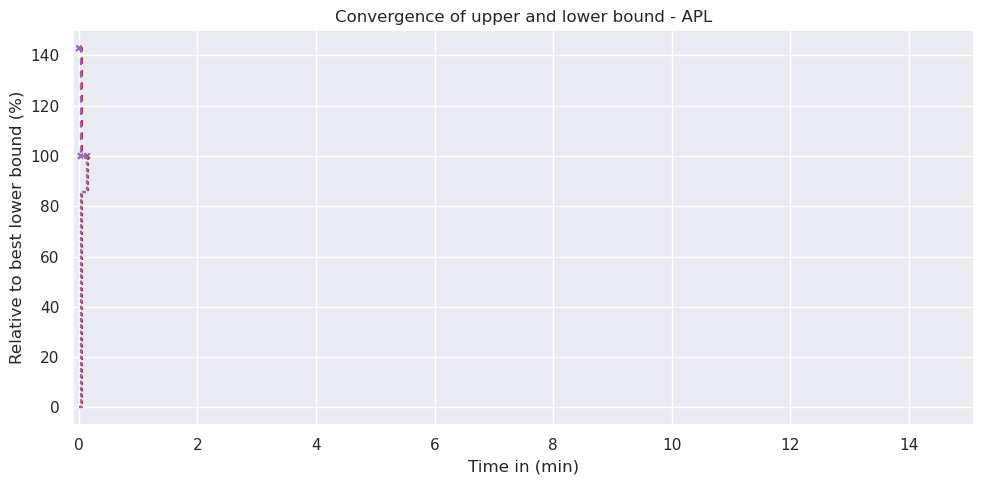

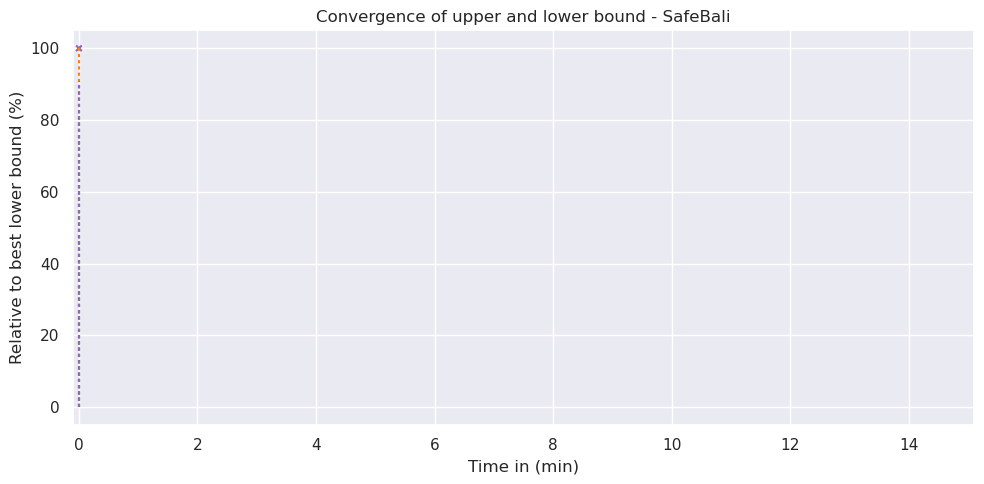

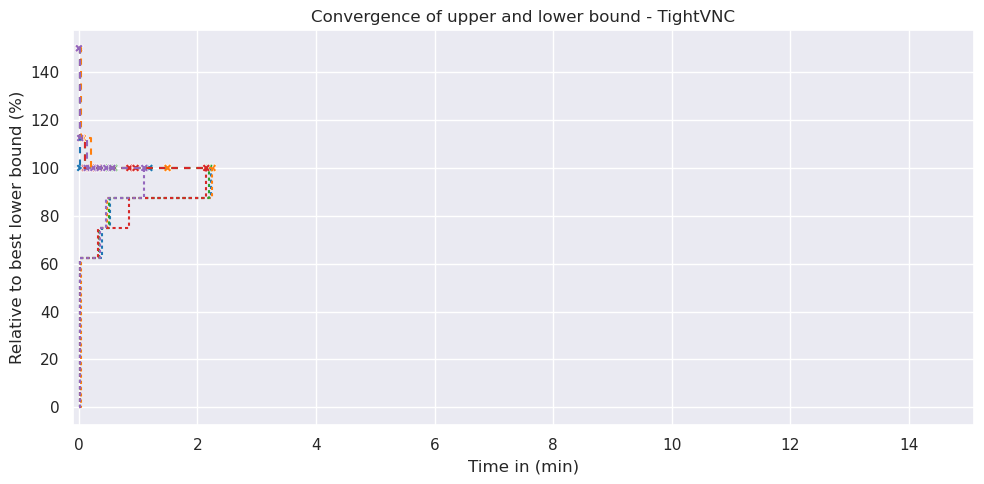

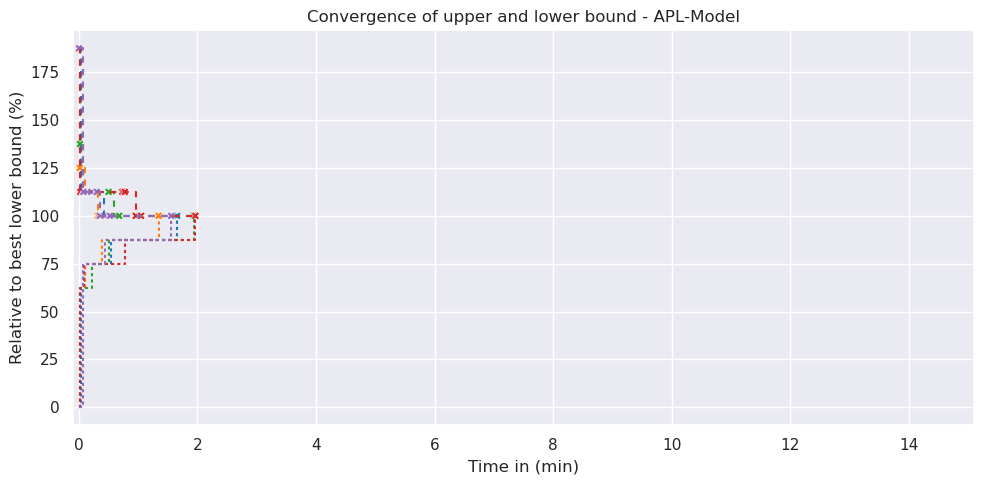

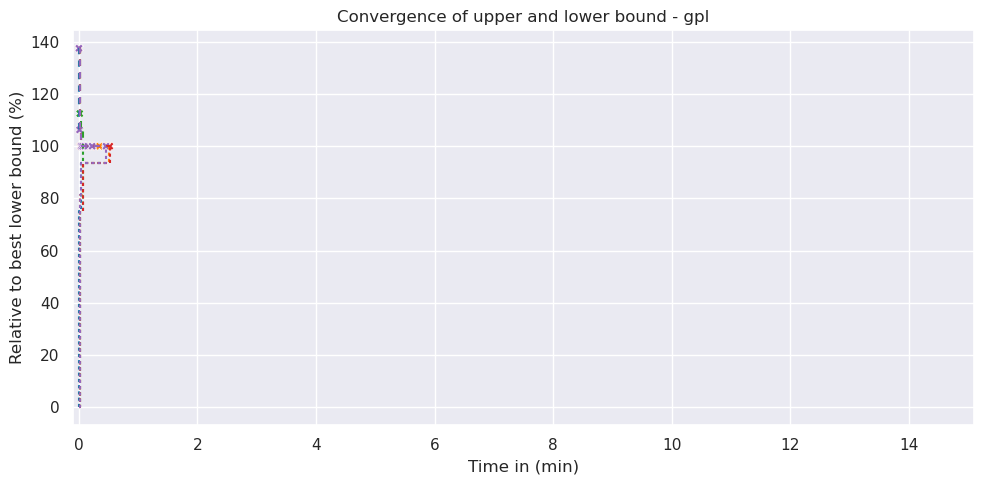

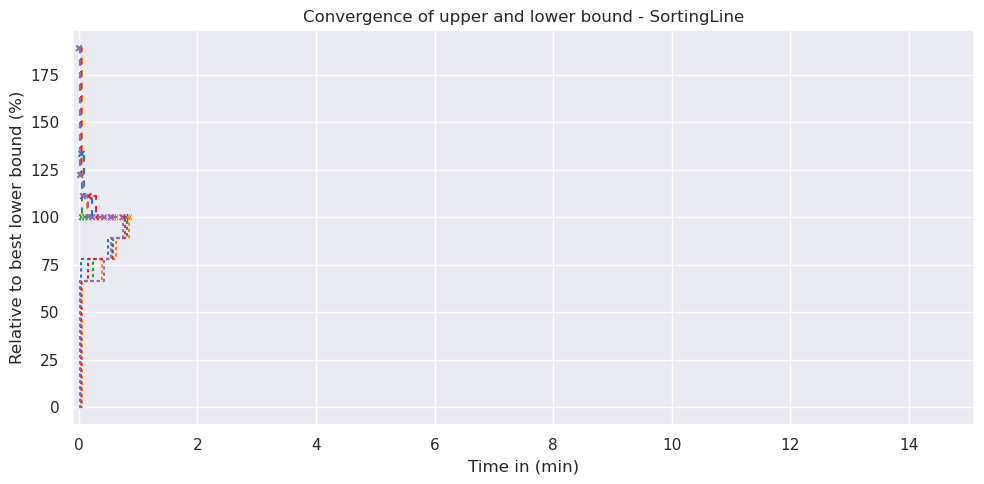

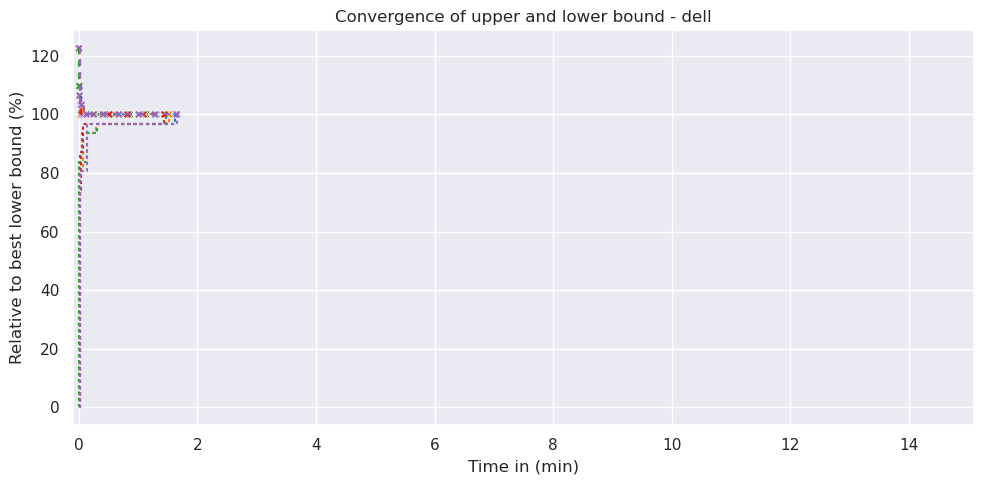

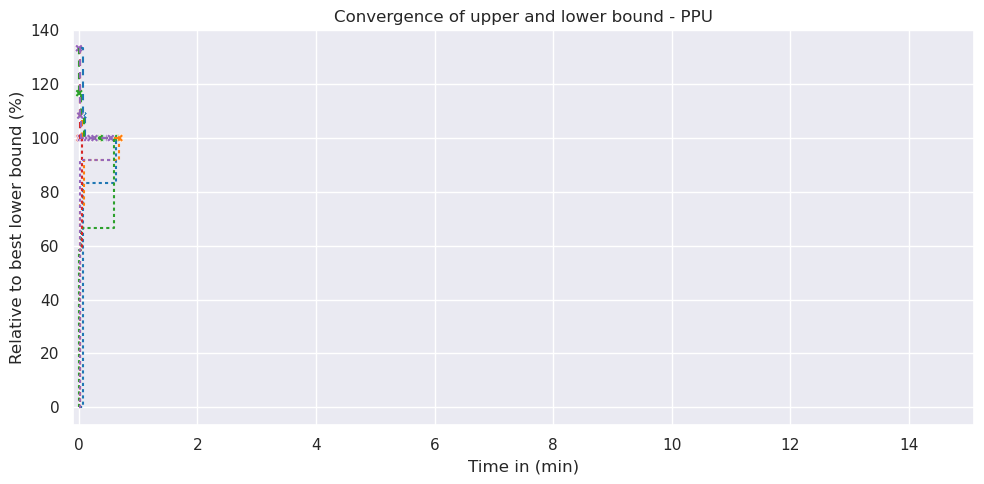

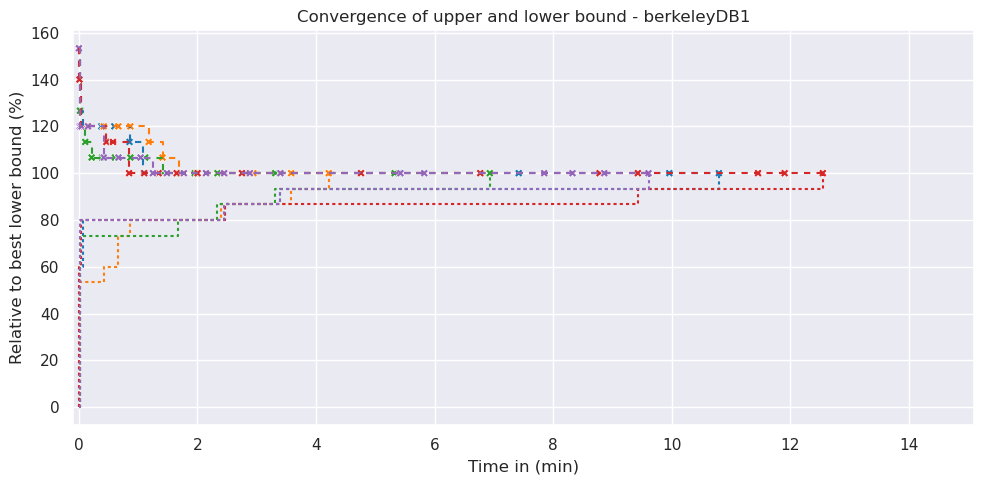

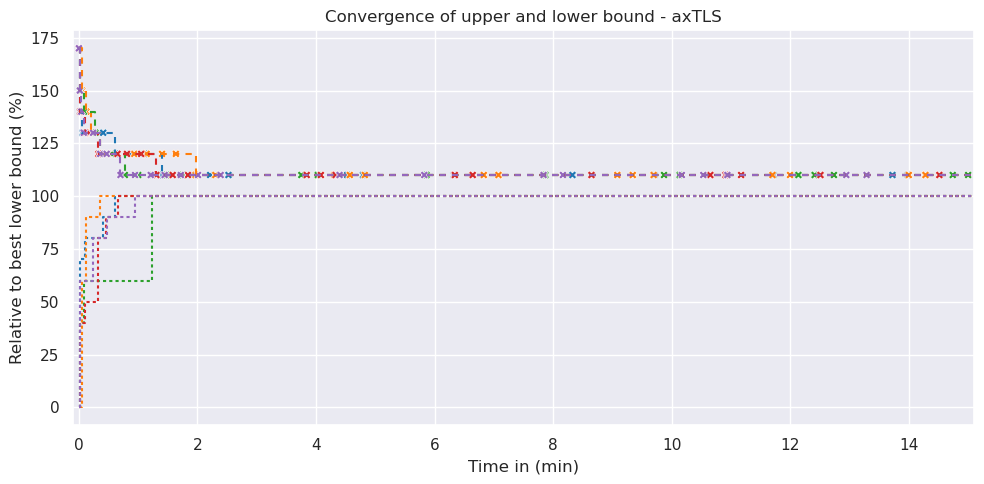

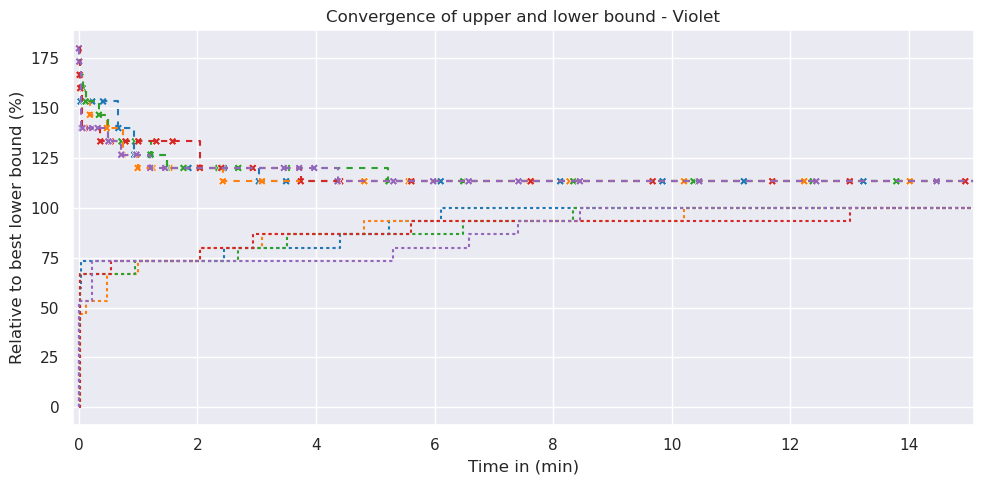

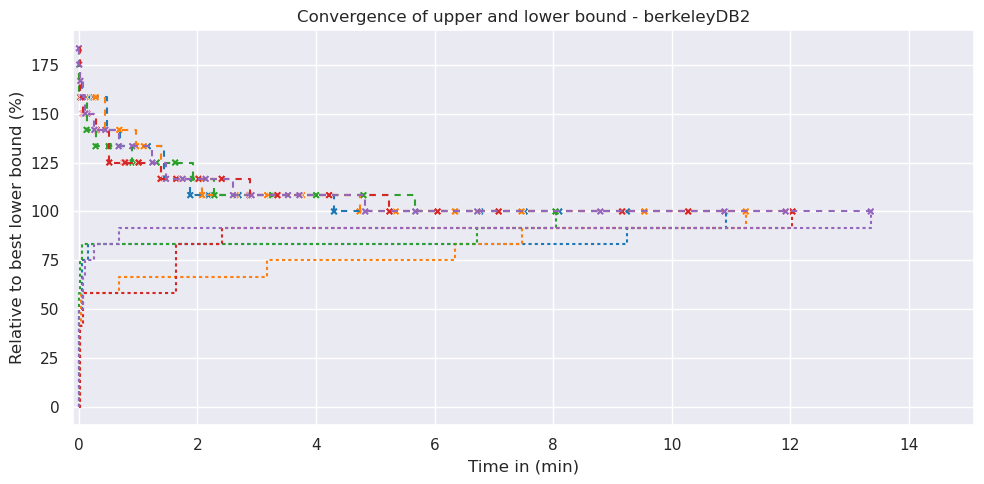

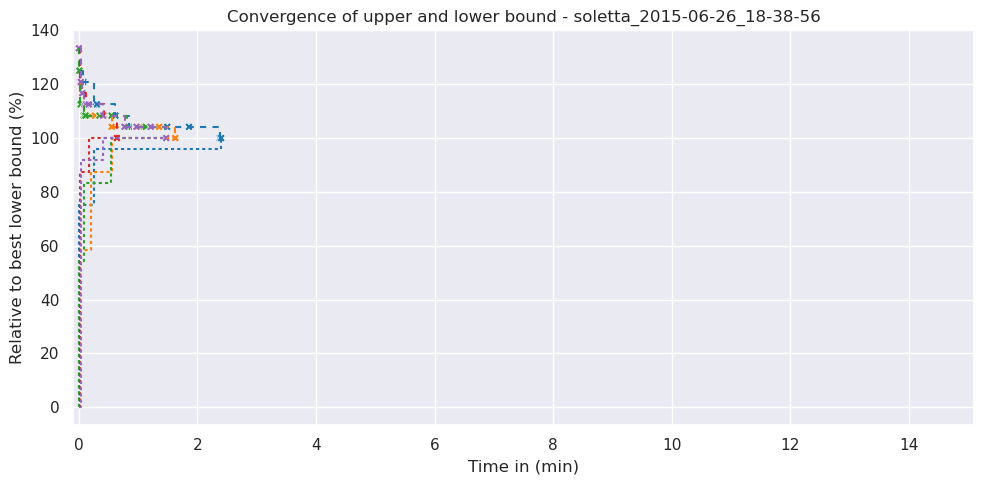

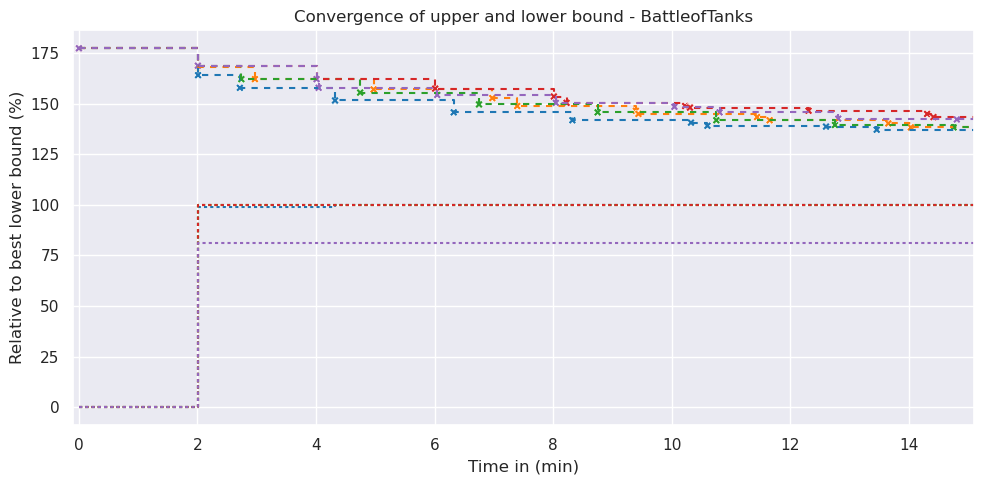

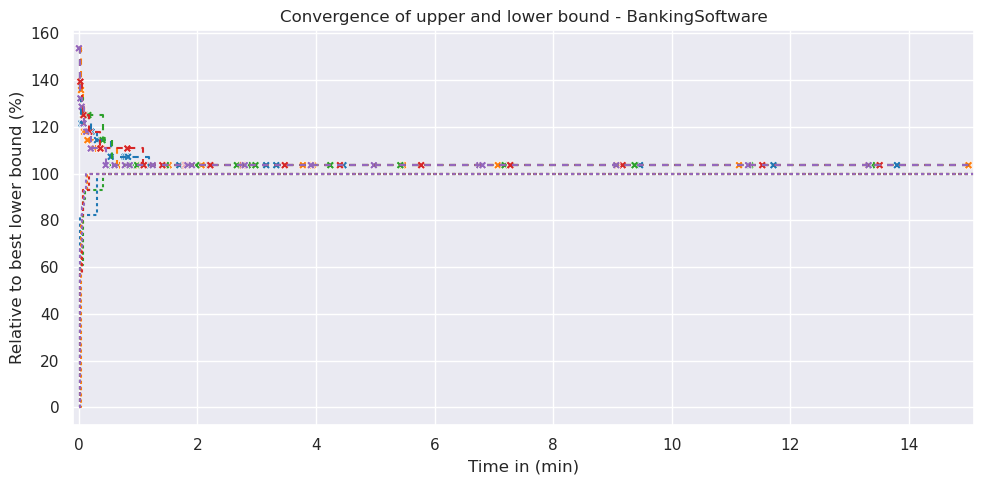

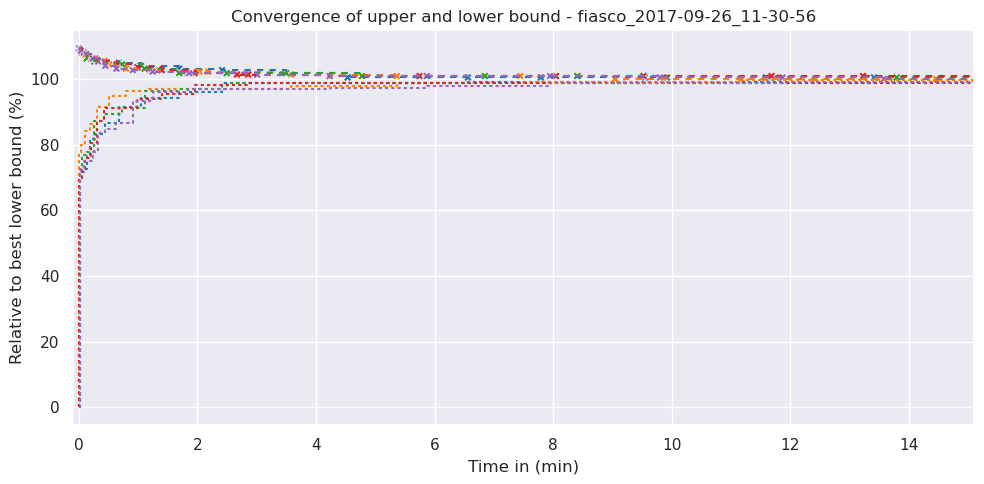

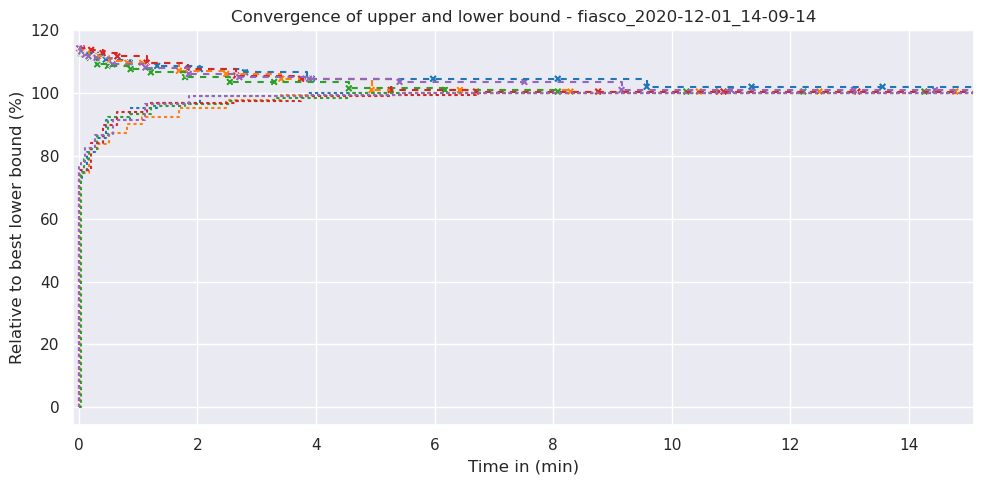

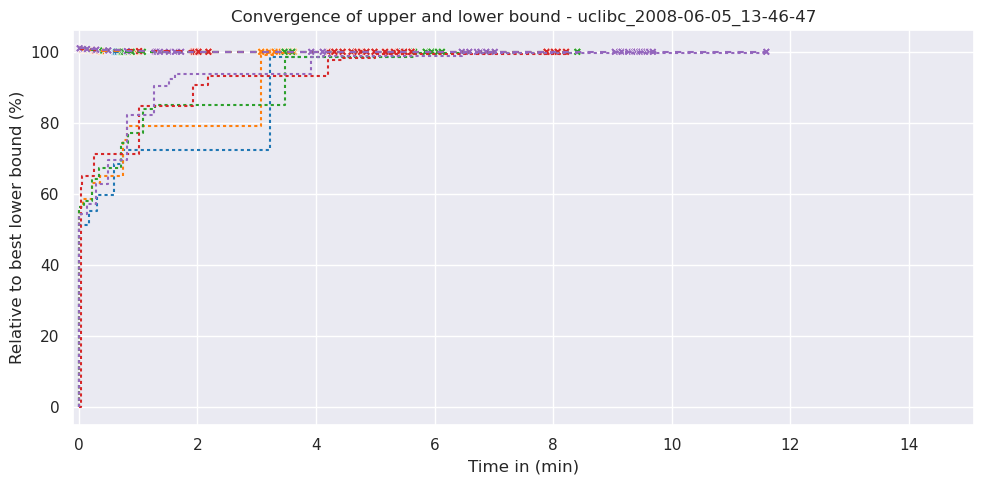

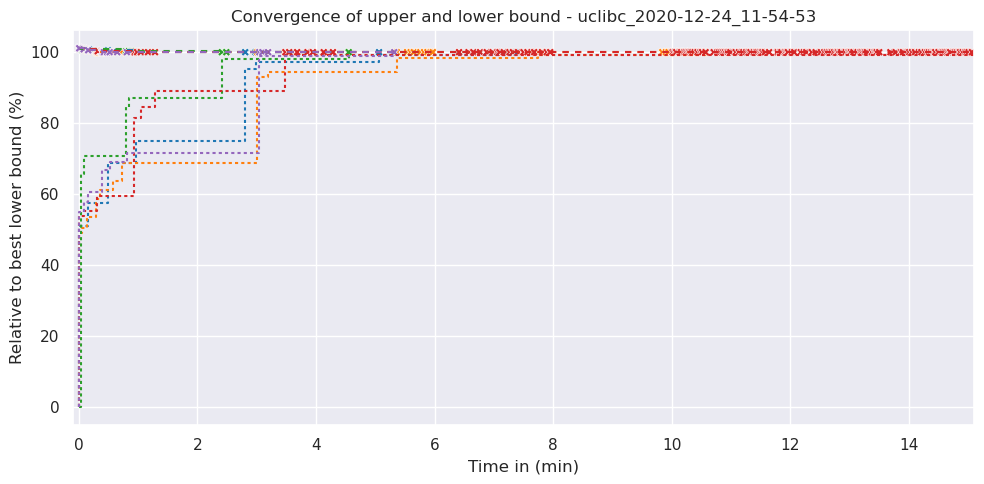

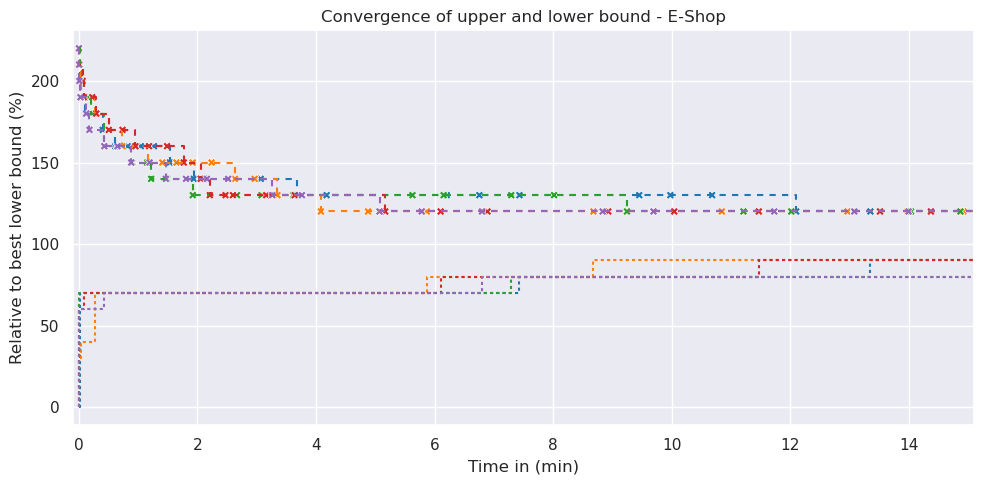

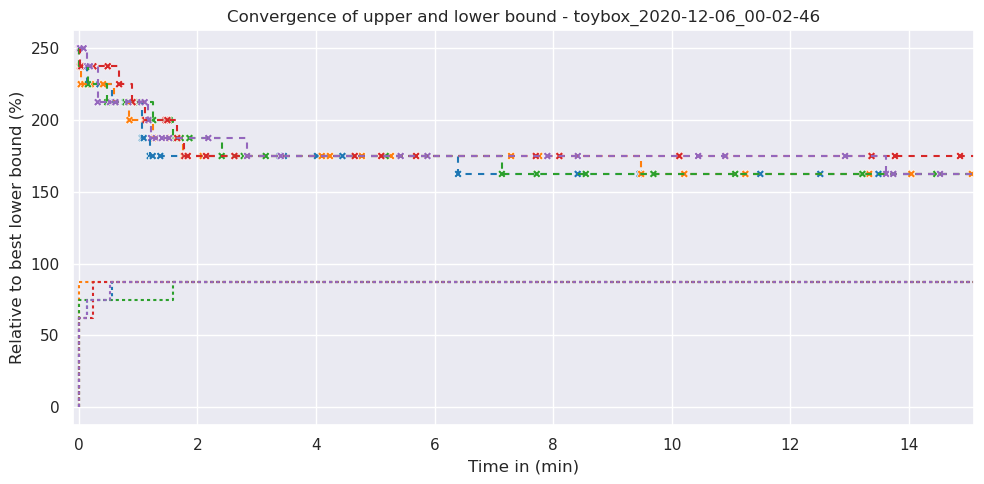

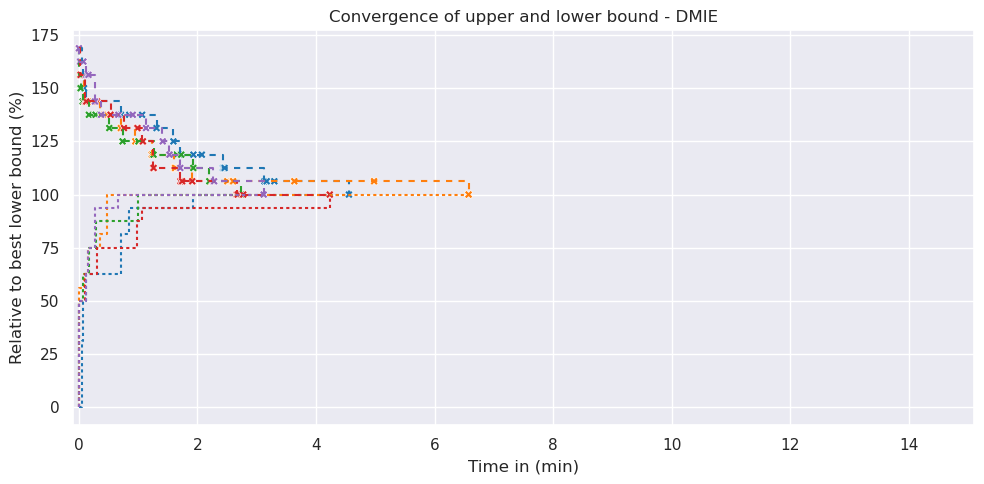

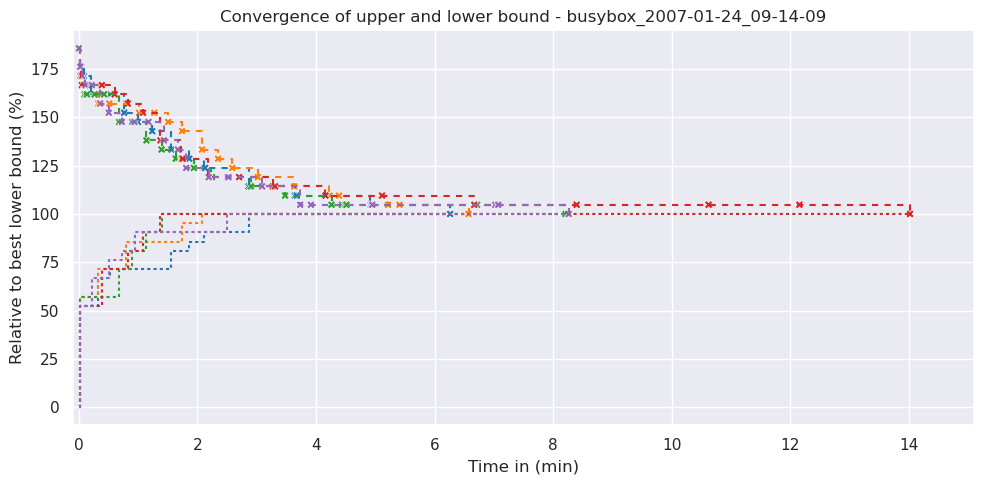

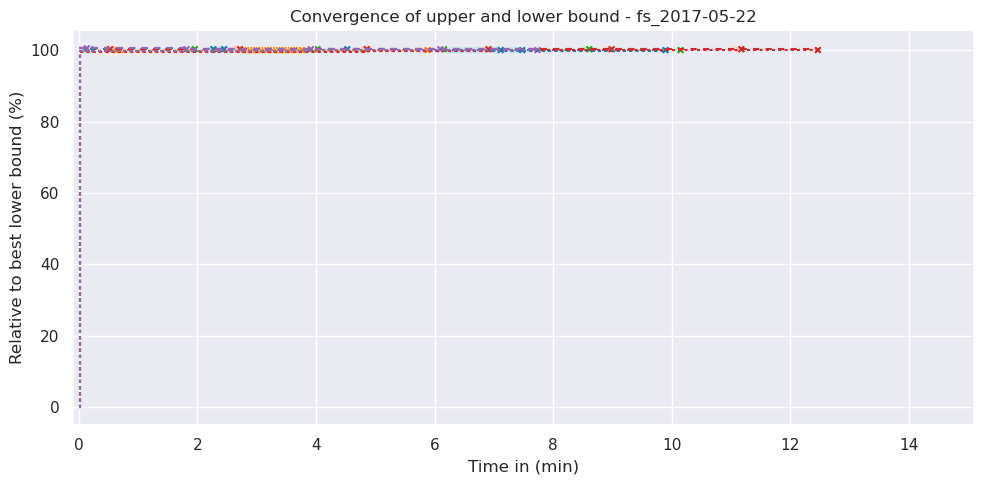

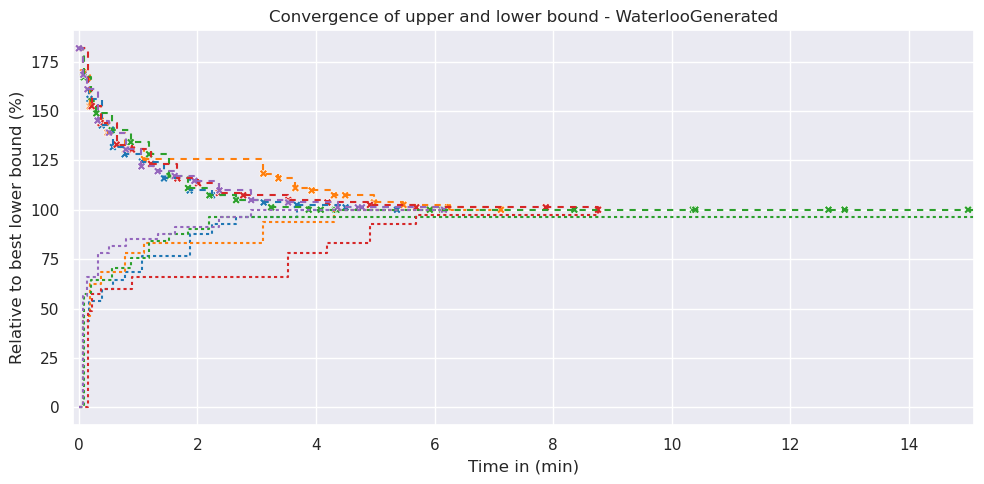

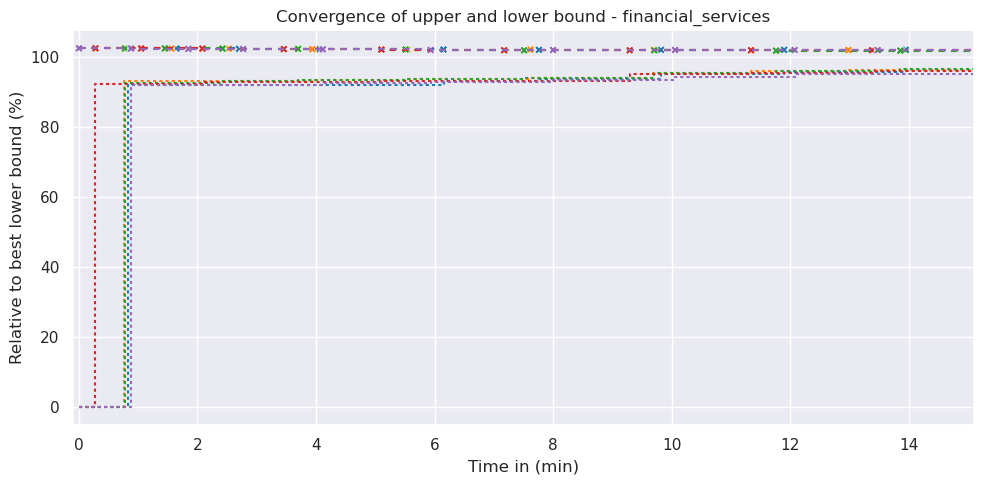

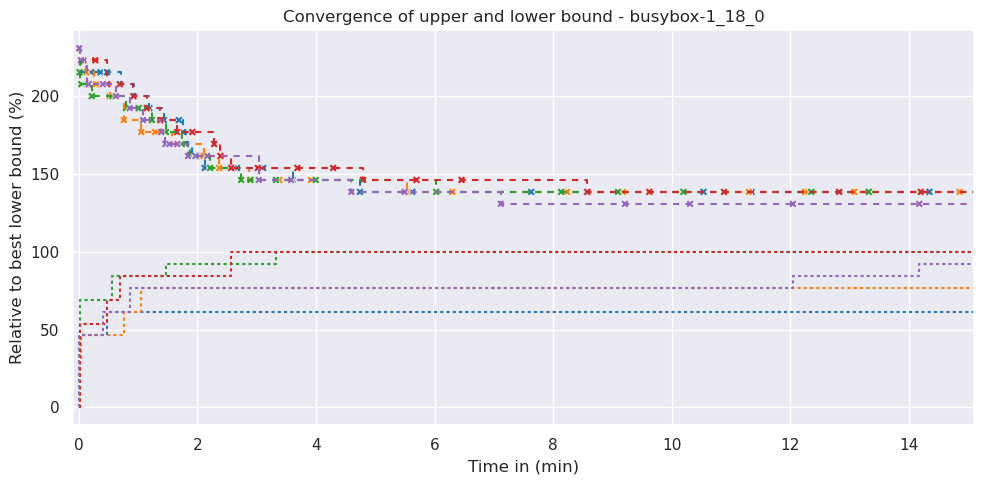

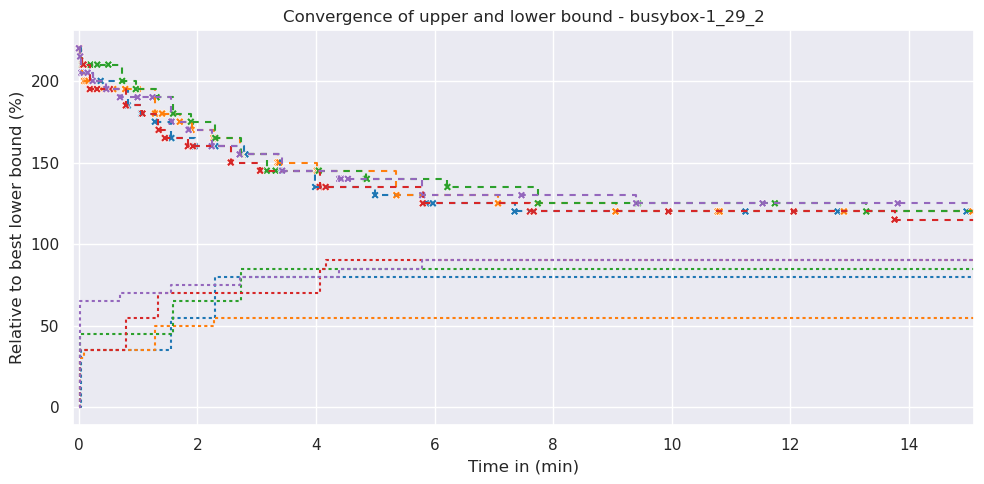

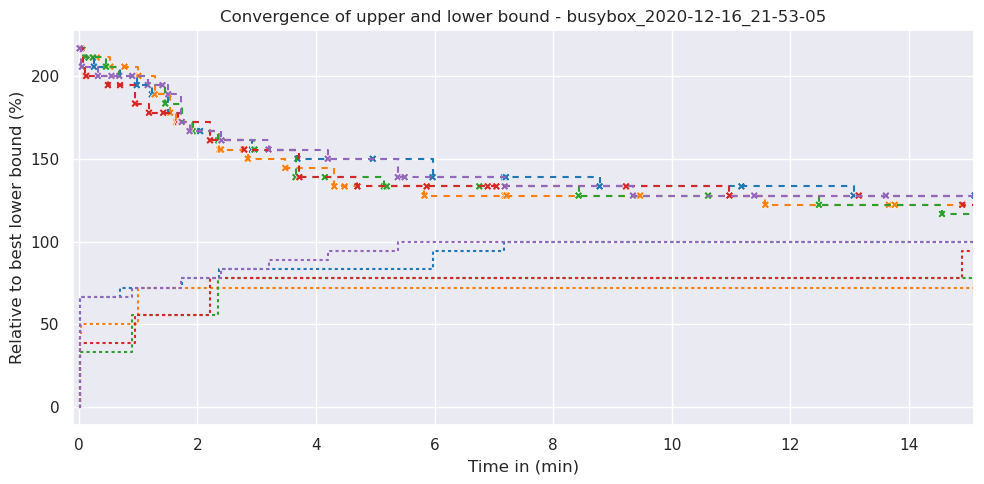

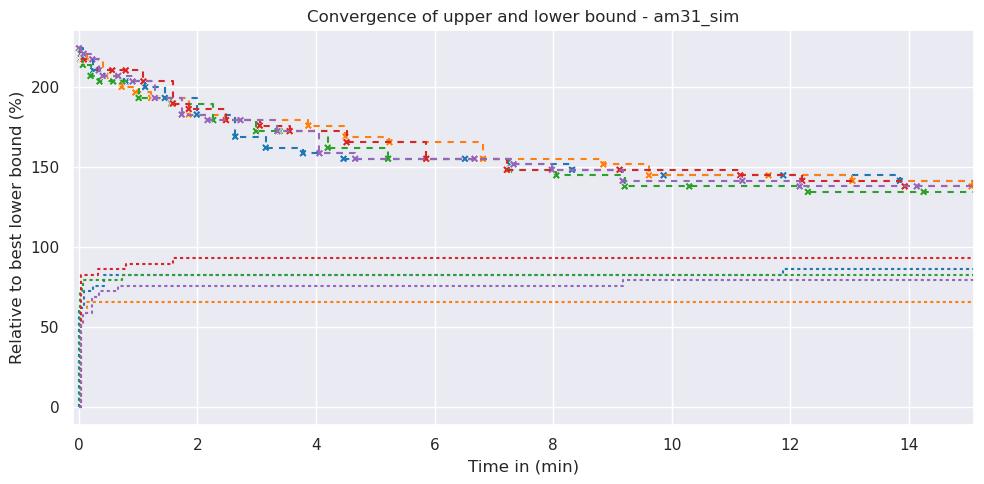

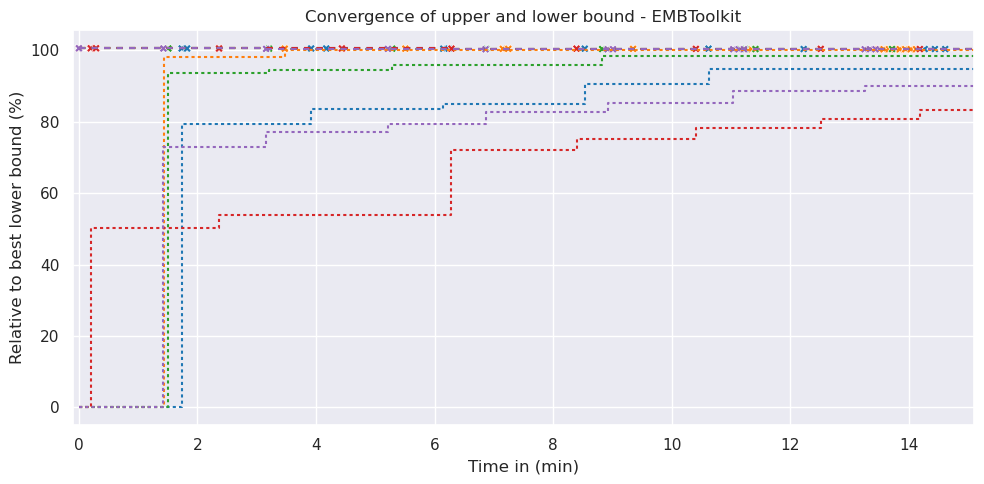

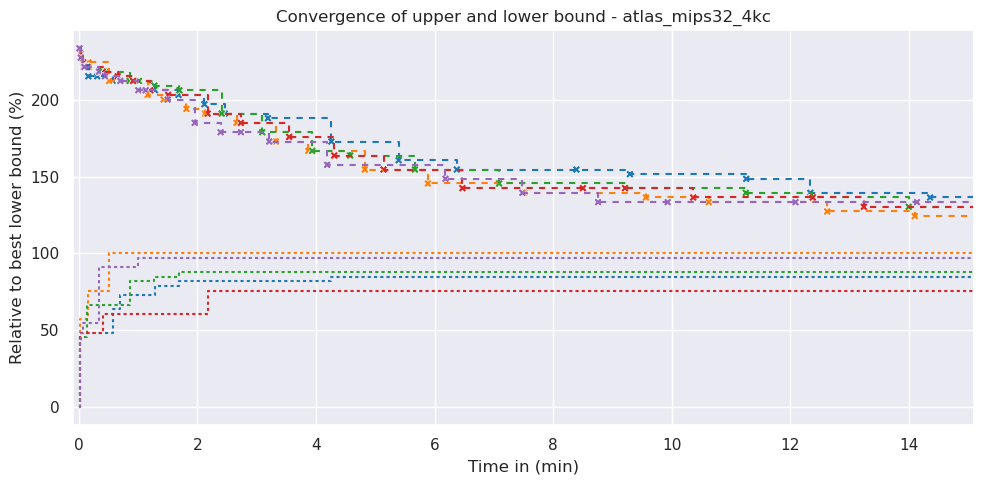

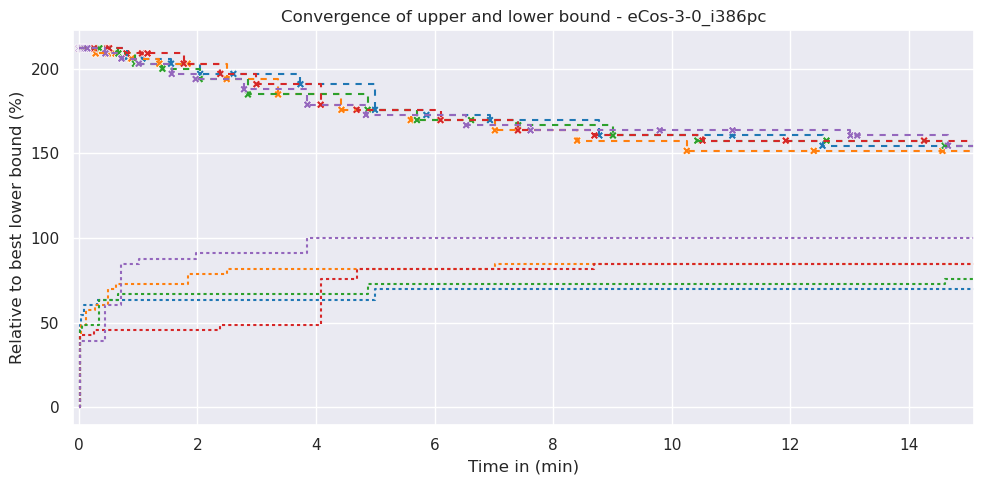

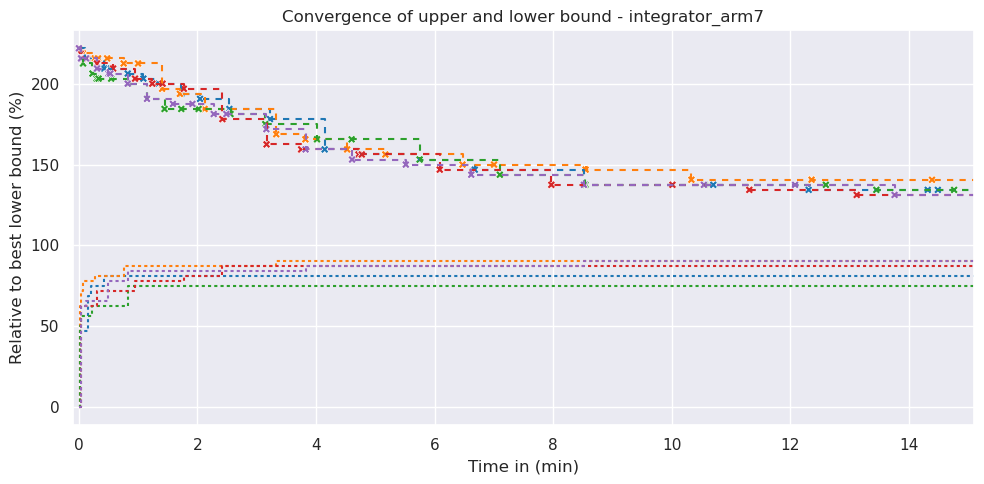

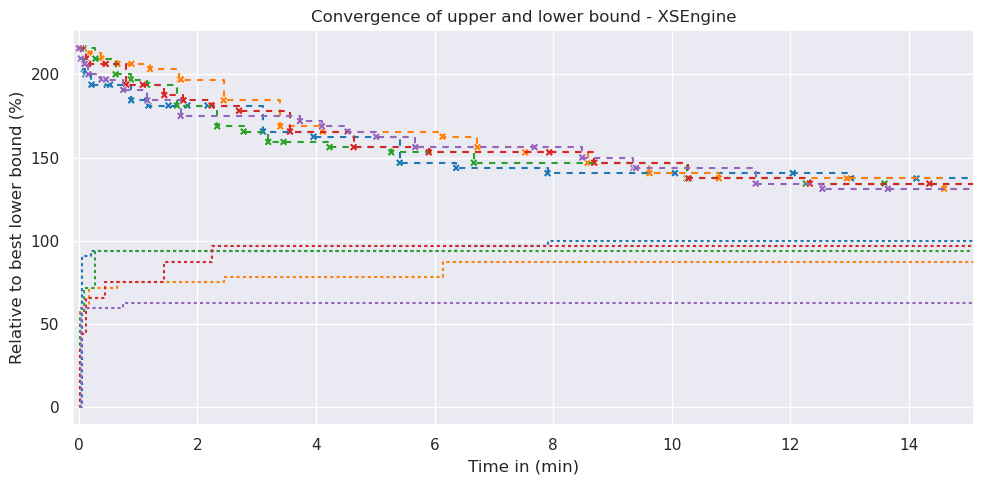

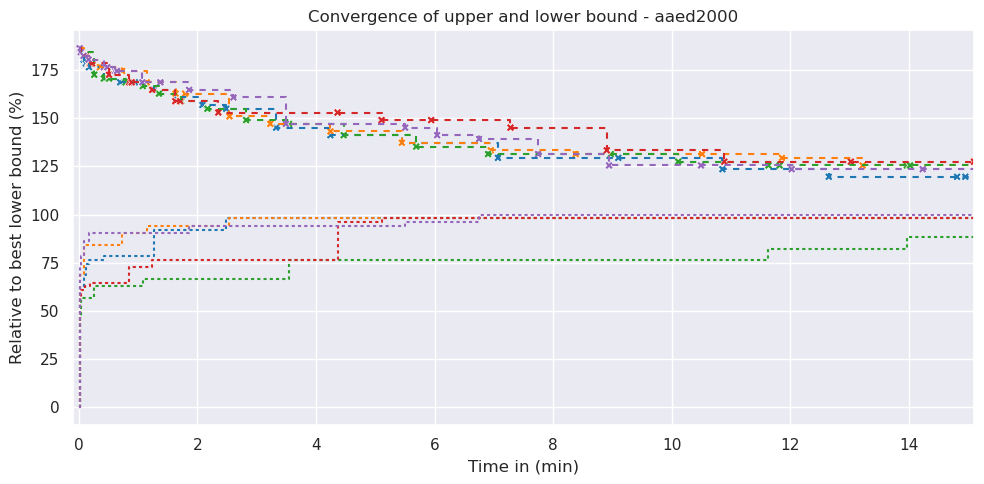

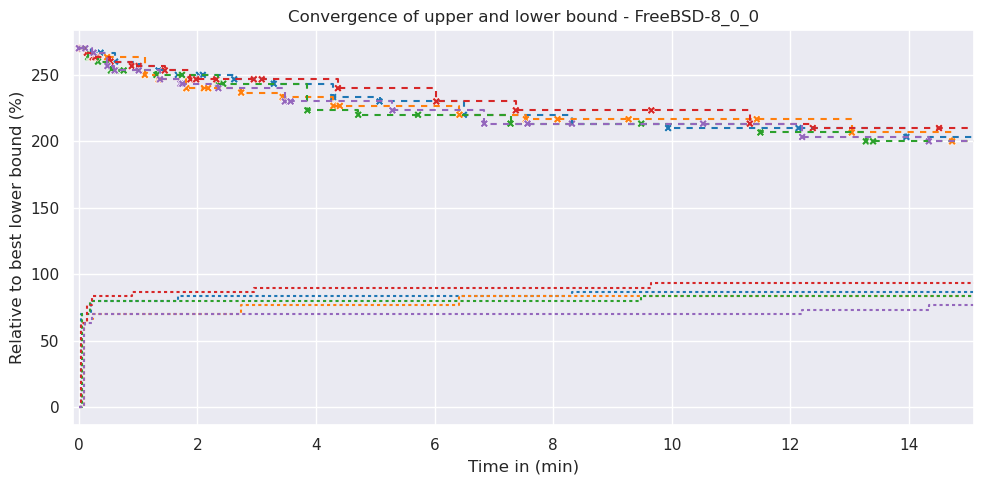

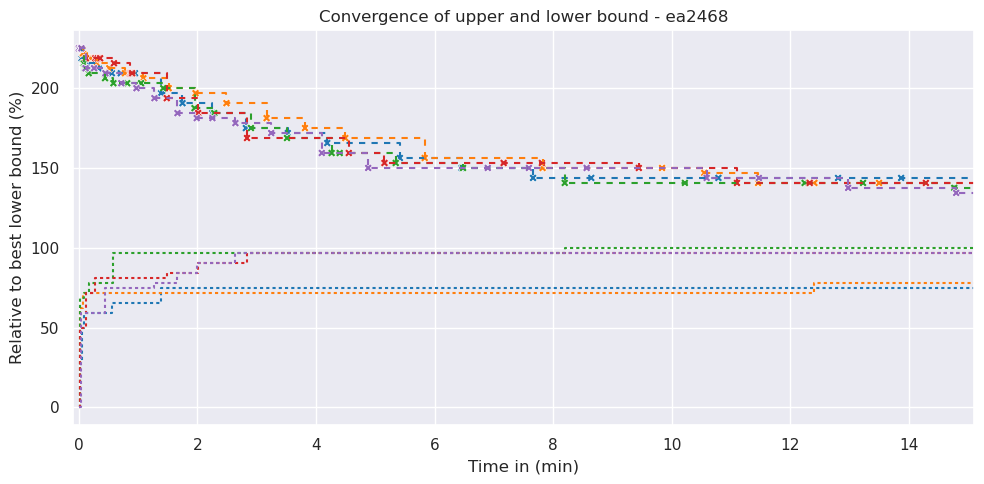

In [31]:
for i in range(1, len(solved_instances), 1):
    plt.figure(figsize=(10, 5))
    plot_lb_ub_progress(
        t[t["instance"].isin(solved_instances[i : i + 1])],
        plt.gca(),
        xmax=15.1,
        single_instance=True,
    )
    plt.tight_layout()
    plt.show()

## Looking onto a selection of instances in a single plot

In [32]:
ec = EventCollector()
selection = [
    "PPU",
    # small, optimal initial sample, no improvement, reached lower bound, progress within seconds + largest system for which an existing sampling algorithm is optimal
    "axTLS",
    # small, bad initial sample, large improvement, tight lower bound, progress for 0/1 min + smallest system that we cannot optimally solve
    "berkeleyDB2",
    # small, bad initial sample, large improvement, reached lower bound, progress for 6/3 min + one of the most significant improvements (43% + optimal afterwards)
    "fs_2017-05-22",
    # medium, good initial sample, small improvement, tight lower bound, progress for 0/10 min + smallest improvement (near-optimal sample still improved)
    "busybox_2020-12-16_21-53-05",
    # medium, bad initial sample, improvement over ~6 minutes, quick progress on lb.
    "FreeBSD-8_0_0"
    # medium, bad initial sample, large improvement, far lower bound, progress for 15/15 min + system with the largest remaining gap between LB=30 and sample=59 (almost 100%)
]
data[data["instance_name"].isin(selection)].drop_duplicates(subset=["instance_name"]).sort_values(
    by=["num_vars", "num_clauses"]
).apply(ec, axis=1)
t_selected = pd.DataFrame(ec.events)
t_selected["instance"] = t_selected["instance"].apply(lambda s: s[:15])

num_vars                                                                    52
num_clauses                                                                109
baseline_alg                                                              YASA
baseline_alg_conf                                                   t2_m1_null
runtime_baseline                                                         0.226
baseline_sample_size                                                        16
path_to_baseline_sample                2023-03-01_13-51-03/16_1_7_5_sample.csv
parameters                   {'func': 'run_samplns', 'args': {'instance_nam...
instance_name                                                              PPU
lower_bound                                                                 12
upper_bound                                                                 12
iteration_info               [{'nbrhd_tuples': 224, 'nbrhd_confs': 11, 'ite...
time_used_by_yasa                                   

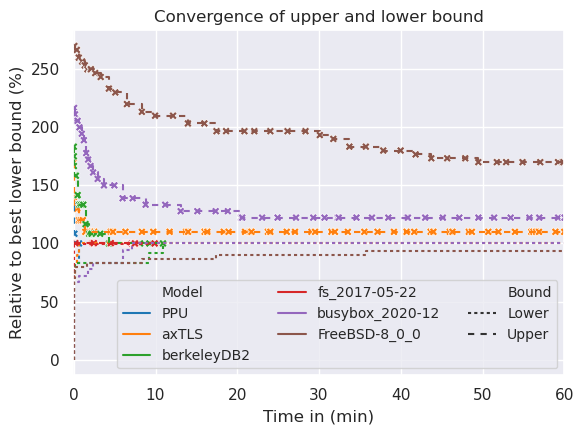

In [37]:
plt.figure(figsize=(6, 4.5))
plot_lb_ub_progress(t_selected, plt.gca(), xmax=60)
plt.legend(ncols=3, loc="lower right", prop={"size": 10})
plt.tight_layout()
plt.savefig("./plots/01_12_convergence_of_selected_models.pdf")
plt.show()

## Time of last change

To get a better grasp of the necessary time.

In [34]:
time_until_last_change = (
    t[t["final"] & (t["instance"].isin(solved_instances))]
    .groupby(["instance", "path", "type"])[["time"]]
    .min()
    .reset_index()
    .groupby(["instance", "type"])[["time"]]
    .mean()
)
time_until_last_change

time
instance                   type            
APL                        Lower   0.141090
                           Upper   0.039964
APL-Model                  Lower   1.691363
                           Upper   0.526825
BankingSoftware            Lower   0.229125
...                                     ...
toybox_2020-12-06_00-02-46 Upper   7.682550
uclibc_2008-06-05_13-46-47 Lower   7.458403
                           Upper   1.043710
uclibc_2020-12-24_11-54-53 Lower  11.051863
                           Upper   0.996308

[92 rows x 1 columns]

In [35]:
(time_until_last_change.groupby("instance")[["time"]].max() < 3).sum()

time    19
dtype: int64

In [36]:
time_until_last_change.reset_index().groupby("type")[["time"]].mean()

time
type            
Lower  10.126964
Upper  14.218609